<a href="https://colab.research.google.com/github/Rutuja2610647/M_L-Project/blob/main/ML_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1 : Load libraries**

In [60]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [61]:
# Load dataset
data = pd.read_excel('/content/AutoInsurance.xlsx')

In [62]:
# Display first five rows
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [63]:
# Display column names
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [64]:

# Check data shape
data.shape

(9134, 24)

In [65]:
# Display no. of rows & columns
print(f'Number of rows:',data.shape[0])
print(f'Number of columns:',data.shape[1])

Number of rows: 9134
Number of columns: 24


**Step 2 : Exploratory Data Analysis (EDA)**

In [66]:
#Are there any missing values?

In [67]:
# Check for missing values
data.isnull().sum()


,0
Customer,0
State,0
Customer Lifetime Value,0
Response,0
Coverage,0
Education,0
Effective To Date,0
EmploymentStatus,0
Gender,0
Income,0


In [68]:
# What are the summary statistics for numerical variables?

In [69]:
# Summary statistics for numerical columns
data.describe()


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [70]:
# Check summary of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [71]:
# Update Scikit-Learn

In [72]:
!pip install -U scikit-learn


In [73]:
# What are the unique values in categorical columns?

In [74]:
# Unique values in categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {data[col].nunique()} unique values")
    print(data[col].unique(), "\n")


Customer: 9134 unique values
['BU79786' 'QZ44356' 'AI49188' ... 'TD14365' 'UP19263' 'Y167826'] 

State: 5 unique values
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

Response: 2 unique values
['No' 'Yes'] 

Coverage: 3 unique values
['Basic' 'Extended' 'Premium'] 

Education: 5 unique values
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

Effective To Date: 59 unique values
['2/24/11' '1/31/11' '2/19/11' '1/20/11'
 datetime.datetime(2011, 2, 3, 0, 0) '1/25/11' '1/18/11' '1/26/11'
 '2/17/11' '2/21/11' datetime.datetime(2011, 1, 6, 0, 0)
 datetime.datetime(2011, 2, 6, 0, 0) datetime.datetime(2011, 1, 10, 0, 0)
 '1/17/11' datetime.datetime(2011, 1, 5, 0, 0) '2/27/11' '1/14/11'
 '1/21/11' datetime.datetime(2011, 2, 5, 0, 0) '1/29/11' '2/28/11'
 datetime.datetime(2011, 2, 12, 0, 0) datetime.datetime(2011, 2, 2, 0, 0)
 datetime.datetime(2011, 2, 7, 0, 0) '1/22/11' '2/13/11' '1/15/11'
 datetime.datetime(2011, 1, 8, 0, 0) datetime.datetime(2011, 1, 11, 0, 0)
 '1/2

In [75]:
# What is the correlation between numerical features?

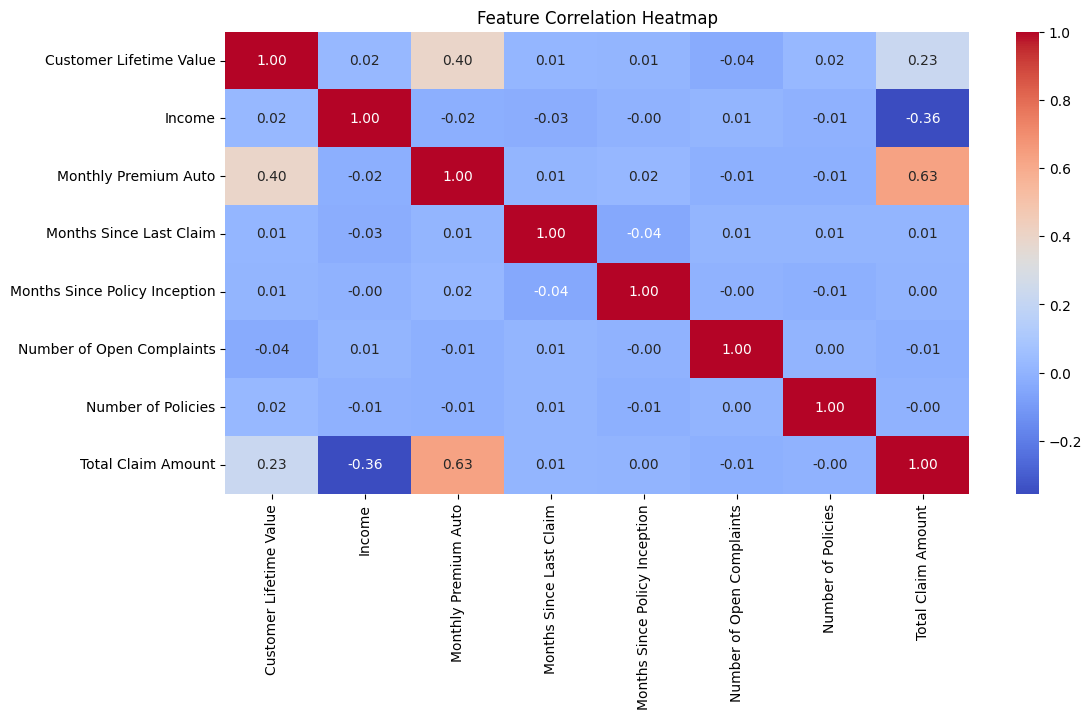

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_data = data.select_dtypes(include=["number"])

plt.figure(figsize=(12, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [77]:
# How is the target variable distributed?

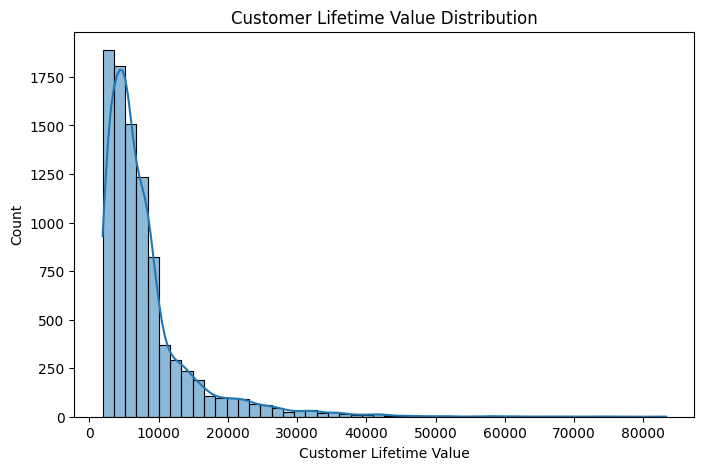

In [78]:
# Distribution of Customer Lifetime Value
plt.figure(figsize=(8, 5))
sns.histplot(data['Customer Lifetime Value'], bins=50, kde=True)
plt.title("Customer Lifetime Value Distribution")
plt.show()


In [79]:
# How do numerical variables relate to CLV?

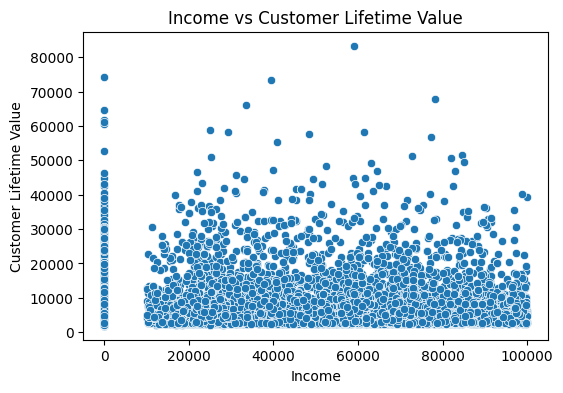

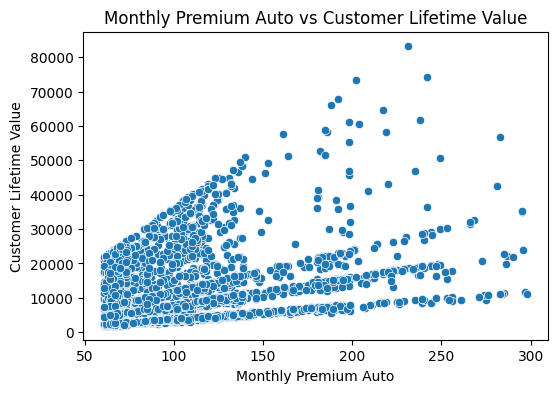

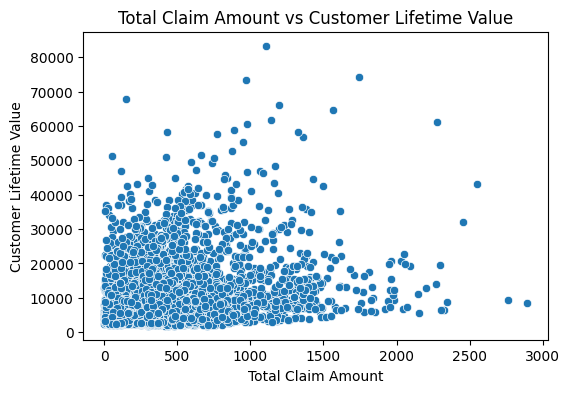

In [80]:
# Scatter plots of important numerical features
num_cols = ['Income', 'Monthly Premium Auto', 'Total Claim Amount']

for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[col], y=data['Customer Lifetime Value'])
    plt.title(f"{col} vs Customer Lifetime Value")
    plt.show()


In [81]:
# How does CLV vary by categorical features?

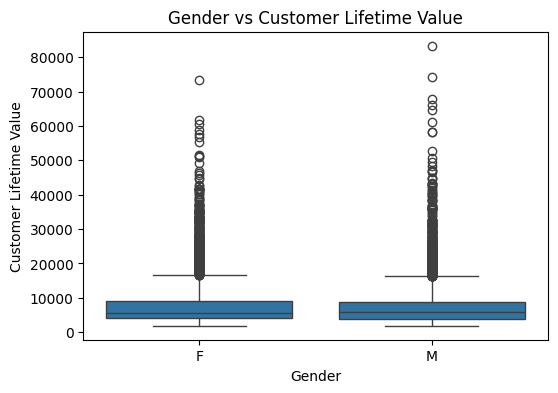

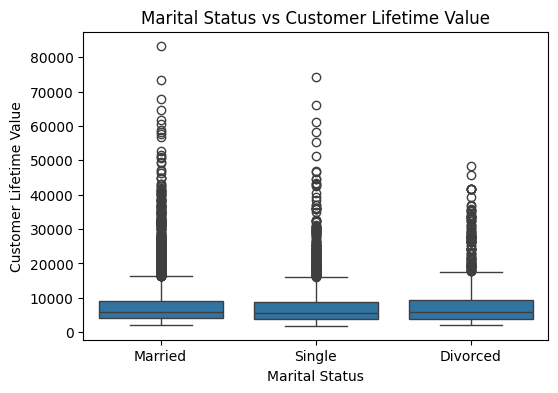

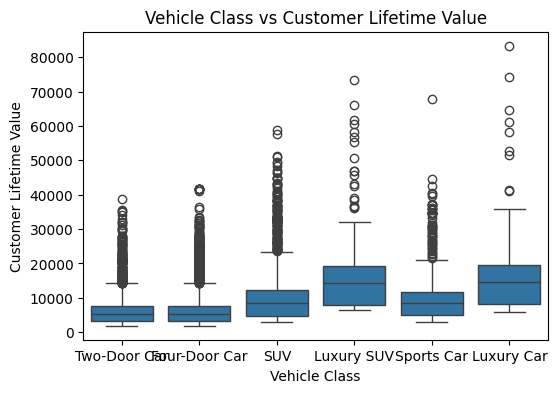

In [82]:
# Boxplots for categorical variables
cat_cols = ['Gender', 'Marital Status', 'Vehicle Class']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col], y=data['Customer Lifetime Value'])
    plt.title(f"{col} vs Customer Lifetime Value")
    plt.show()


**Step 3: Feature Engineering & Data Preprocessing**

In [83]:
#  Which features should be removed?

In [84]:
# Drop unnecessary columns
data.drop(columns=['Customer', 'Effective To Date'], inplace=True)


In [85]:
# How do we encode categorical variables?

In [86]:
# One-hot encoding for categorical features
data = pd.get_dummies(data, drop_first=True)


In [87]:
# How do we scale numerical variables?

In [88]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical features
scaler = MinMaxScaler()
num_features = ['Income', 'Monthly Premium Auto', 'Total Claim Amount']
data[num_features] = scaler.fit_transform(data[num_features])


**Step 4: Model Selection & Training**

In [89]:
# How do we split the dataset?

In [90]:
from sklearn.model_selection import train_test_split

# Define target variable and features
X = data.drop(columns=['Customer Lifetime Value'])
y = data['Customer Lifetime Value']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [91]:
X.head()

,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_California,State_Nevada,State_Oregon,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.562847,0.033755,32,5,0,1,0.132974,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,0.000000,0.139241,13,42,0,8,0.391051,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,0.487763,0.198312,18,38,0,2,0.195764,False,True,False,...,False,False,False,False,False,False,False,True,True,False
3,0.000000,0.189873,18,65,0,7,0.183117,True,False,False,...,False,True,False,False,False,True,False,False,True,False
4,0.438443,0.050633,12,44,0,1,0.047710,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [92]:
y.head()

,Customer Lifetime Value
0,2763.519279
1,6979.535903
2,12887.431650
3,7645.861827
4,2813.692575


In [93]:
# Which regression models should we use?

In [94]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7307, 50) (1827, 50) (7307,) (1827,)


In [95]:
from sklearn.model_selection import train_test_split

# Assume df is your dataframe and 'Customer_Lifetime_Value' is your target variable
X = data.drop(columns=['Customer Lifetime Value'])  # Replace with your target column
y = data['Customer Lifetime Value']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7307, 50) (1827, 50) (7307,) (1827,)


In [96]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor()
}


In [97]:

import sklearn
print(sklearn.__version__)

1.6.1


In [98]:

pip install --upgrade scikit-learn

In [99]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Manually calculate RMSE
    print(f"{name}: R² Score = {r2_score(y_test, y_pred):.4f}, RMSE = {rmse:.4f}")


Linear Regression: R² Score = 0.1551, RMSE = 6598.5929
Ridge Regression: R² Score = 0.1565, RMSE = 6593.4039
Lasso Regression: R² Score = 0.1566, RMSE = 6592.7256
Decision Tree: R² Score = 0.4606, RMSE = 5272.3714
Random Forest: R² Score = 0.6867, RMSE = 4018.0049
AdaBoost: R² Score = 0.1984, RMSE = 6427.3297


In [100]:
import sklearn
print("scikit-learn version:", sklearn.__version__)


scikit-learn version: 1.6.1


**Step 5: Hyperparameter Tuning**

In [101]:
#  How do we optimize Random Forest?

In [102]:

from sklearn.model_selection import GridSearchCV

In [103]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


In [104]:
# Example: Load your dataset (modify the path if needed)
df = pd.read_excel("/content/AutoInsurance.xlsx")

# Define features and target variable (replace 'Customer_Lifetime_Value' with your target column name)
X = df.drop(columns=['Customer Lifetime Value'])
y = df['Customer Lifetime Value']

# If you have categorical columns, encode them first (e.g., using pd.get_dummies)
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Import and Define Hyperparameters**

In [105]:
# How do we make predictions for a single record?

In [106]:
sample = X_test.iloc[0].values.reshape(1, -1)


In [107]:
import pandas as pd

# Load the dataset
df = pd.read_excel("/content/AutoInsurance.xlsx")

# Drop identifier and date columns
df.drop(columns=['Customer', 'Effective To Date'], inplace=True)

# Define features and target variable
X = df.drop(columns=['Customer Lifetime Value'])
y = df['Customer Lifetime Value']


In [108]:
# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)


In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'max_depth': 20, 'n_estimators': 100}


In [111]:
import joblib
joblib.dump(best_rf, "customer_lifetime_value_model.pkl")


['customer_lifetime_value_model.pkl']

In [112]:
# Select the first row from X_test as a DataFrame
sample = X_test.iloc[[0]]

# Reindex the sample to have exactly the same columns as X_train
sample = sample.reindex(columns=X_train.columns, fill_value=0)

# Make the prediction using the best model from GridSearchCV
predicted_clv = best_rf.predict(sample)
print(f"Predicted Customer Lifetime Value: {predicted_clv[0]:.2f}")


Predicted Customer Lifetime Value: 4258.53


In [113]:
# Correctly select the first row from X_test as a DataFrame:
sample = X_test.iloc[[0]]
predicted_clv = best_rf.predict(sample)
print(f"Predicted Customer Lifetime Value: {predicted_clv[0]:.2f}")


Predicted Customer Lifetime Value: 4258.53


In [114]:
# Select a random test sample
sample = X_test.iloc[0].values.reshape(1, -1)

# Predict CLV
predicted_clv = best_rf.predict(sample)
print(f"Predicted Customer Lifetime Value: {predicted_clv[0]:.2f}")


Predicted Customer Lifetime Value: 4258.53


**Statistical Tests**

In [115]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy.stats import mannwhitneyu, kruskal

In [116]:
# Statistical Tests
num_features = data.select_dtypes(include=[np.number]).columns.tolist()
num_features.remove('Customer Lifetime Value')  # Exclude target variable
print("\nOLS Regression for Numerical Features:")
for feature in num_features:
    X = sm.add_constant(data[feature])
    y = data['Customer Lifetime Value']
    model = sm.OLS(y, X).fit()
    print(f"Feature: {feature}")
    print(model.summary())
    print("-"*50)


OLS Regression for Numerical Features:
Feature: Income
                               OLS Regression Results                              
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.000
Method:                      Least Squares   F-statistic:                     5.425
Date:                     Wed, 12 Mar 2025   Prob (F-statistic):             0.0199
Time:                             16:02:31   Log-Likelihood:                -93657.
No. Observations:                     9134   AIC:                         1.873e+05
Df Residuals:                         9132   BIC:                         1.873e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

**Step 7: Final Submission**

In [117]:
# How do we save the model?

In [118]:
import joblib

# Save the trained model
joblib.dump(best_rf, "customer_lifetime_value_model.pkl")


['customer_lifetime_value_model.pkl']